In [1]:
import os

import numpy  as np
import tables as tb
import pandas as pd

import matplotlib.pyplot as plt

from invisible_cities.io.dst_io               import load_dst

# NEXT-100 5 bar Simulation

### NEXUS

In [2]:
tb.open_file('/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_1.h5', mode='r')

File(filename=/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_1.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/MC (Group) ''
/MC/configuration (Table(27,)) ''
  description := {
  "param_key": StringCol(itemsize=300, shape=(), dflt=b'', pos=0),
  "param_value": StringCol(itemsize=300, shape=(), dflt=b'', pos=1)}
  byteorder := 'irrelevant'
  chunkshape := (32768,)
/MC/hits (Table(25873,)) ''
  description := {
  "event_id": Int64Col(shape=(), dflt=0, pos=0),
  "x": Float32Col(shape=(), dflt=0.0, pos=1),
  "y": Float32Col(shape=(), dflt=0.0, pos=2),
  "z": Float32Col(shape=(), dflt=0.0, pos=3),
  "time": Float32Col(shape=(), dflt=0.0, pos=4),
  "energy": Float32Col(shape=(), dflt=0.0, pos=5),
  "label": StringCol(itemsize=100, shape=(), dflt=b'', pos=6),
  "particle_id": Int32Col(shape=(), dflt=0, pos=7),
  "hit_id": Int32Col(shape=(), dflt=0, pos=8)}
  byteorder :=

In [3]:
hits   = [] 

for ifile in range(0, 11): # ONLY A FEW, I DIDN'T DOWNLOAD MANY OF THE FILES... 
    
    file = f'/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_{ifile}.h5'

    
    if os.path.exists(file): 
        
        print(file)
        
        hit = load_dst(file, 'MC', 'hits')

        hits.append(hit)
        
hit  = pd.concat(hits,   ignore_index=True)

/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_1.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_2.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_3.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_4.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_5.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_6.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_7.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_8.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_9.h5
/Users/cherves/NEXT/5bar/nexus/next100_kr83m_nexus_10.h5


In [4]:
hit

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,263.855682,282.699738,1188.215454,0.000240,0.000739,ACTIVE,2,0
1,0,263.873596,282.692291,1188.216797,0.000597,0.002399,ACTIVE,2,1
2,0,263.868561,282.701324,1188.210205,0.000861,0.000251,ACTIVE,2,2
3,0,263.869843,282.702118,1188.221680,0.001116,0.002124,ACTIVE,2,3
4,0,263.866089,282.698090,1188.224731,0.001287,0.001567,ACTIVE,2,4
...,...,...,...,...,...,...,...,...,...
261285,9999,248.567215,-9.544160,895.653015,0.006078,0.001447,ACTIVE,1,7
261286,9999,248.565475,-9.552582,895.667664,0.006404,0.000571,ACTIVE,1,8
261287,9999,248.564606,-9.537370,895.668884,0.006709,0.002775,ACTIVE,1,9
261288,9999,248.566772,-9.544429,895.671448,0.006906,0.003824,ACTIVE,1,10


In [5]:
assert len(hit[hit['label'] == 'BUFFER'])+len(hit[hit['label'] == 'ACTIVE']) == len(hit)

In [6]:
single_hit = hit.groupby(['event_id'])[['energy']].sum().reset_index()


def grouped_weighted_avg(values, weights, item):
    return (values * weights).groupby(item).sum() / weights.groupby(item).sum()
    

single_hit['x']     = np.array(grouped_weighted_avg(values=hit.x, weights=hit.energy, item=hit.event_id))
single_hit['y']     = np.array(grouped_weighted_avg(values=hit.y, weights=hit.energy, item=hit.event_id))
single_hit['z']     = np.array(grouped_weighted_avg(values=hit.z, weights=hit.energy, item=hit.event_id))

single_hit['nhits'] = hit.groupby(['event_id'], as_index=False)['hit_id'].max().hit_id.values

In [7]:
single_hit

,event_id,energy,x,y,z,nhits
0,0,0.041543,263.562805,282.895844,1188.498413,19
1,1,0.041543,340.067780,-46.965858,934.262085,18
2,2,0.041543,-412.402069,-268.185181,685.161072,15
3,3,0.041543,360.588043,199.234207,467.497284,16
4,4,0.041543,288.283173,58.148209,923.955872,14
...,...,...,...,...,...,...
9995,9995,0.041543,413.422852,-90.698471,460.353394,12
9996,9996,0.041543,-413.582245,94.606308,622.435364,12
9997,9997,0.041543,189.470917,399.780914,302.054138,15
9998,9998,0.041543,-41.728268,-6.027369,847.651123,13


Text(0, 0.5, 'Entries')

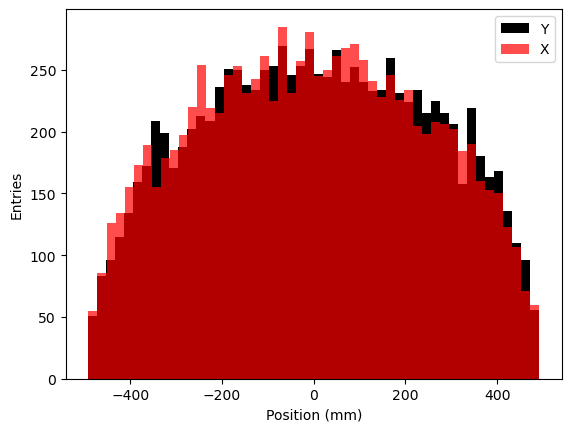

In [8]:
plt.hist(single_hit.x, bins = 50, color='k', label='Y');
plt.hist(single_hit.y, bins = 50, color='r', label='X', alpha=0.7);
plt.legend()
plt.xlabel('Position (mm)')
plt.ylabel('Entries')

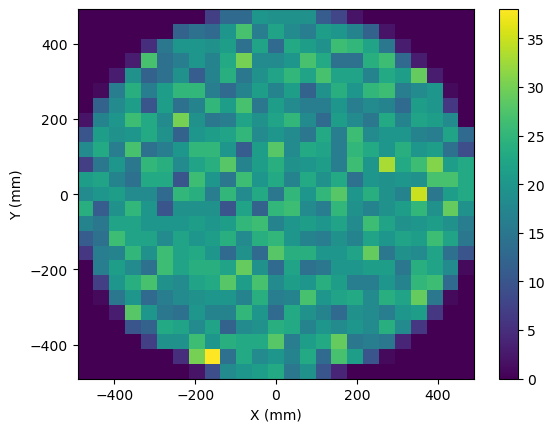

In [9]:
plt.hist2d(single_hit.x, single_hit.y, bins=[25, 25]);
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.colorbar()

Text(0, 0.5, 'Entries')

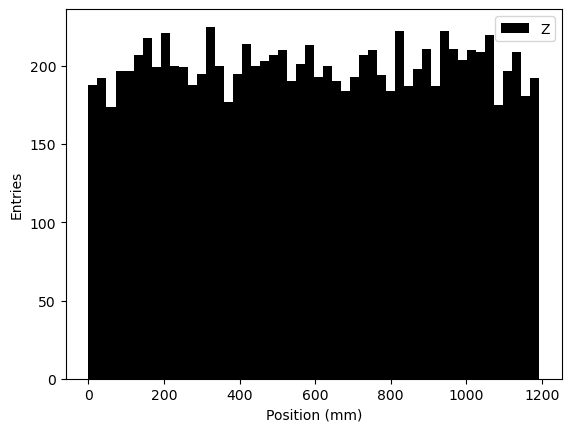

In [10]:
plt.hist(single_hit.z, bins = 50, color='k', label='Z');
plt.legend()
plt.xlabel('Position (mm)')
plt.ylabel('Entries')

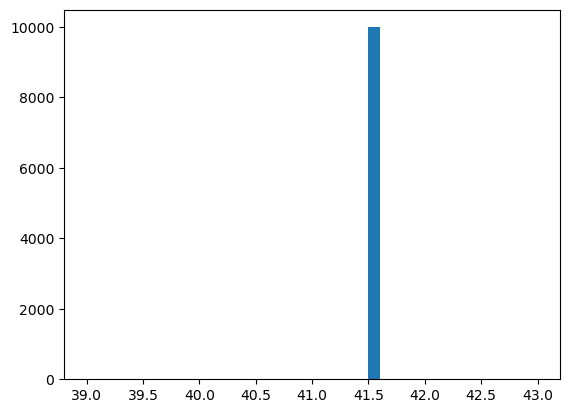

In [11]:
plt.hist(single_hit.energy*1000, bins = 40, range = [39,43]);

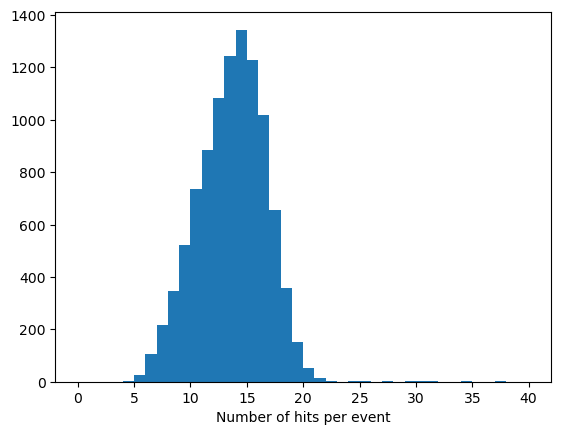

In [12]:
plt.hist(single_hit.nhits, bins=40, range = [0, 40])
plt.xlabel('Number of hits per event');

## DIFFERENT DETSIM PARAMETERS:

| Parameter | 13.5 bar | 5 bar |
| ---: | :---: | :---: |
|$v_d$ $(\text{mm}/\mu s)$ | 0.84 | 1.05 |
|$v_{d_{EL}}$ $(\text{mm}/\mu s)$ | 2.75 | 4.55 |
|$$D_{T} \; (\text{mm /}\sqrt{\text{cm}})$$ | 1.10 | 1.44 |
| $D_L \; (\text{mm /}\sqrt{\text{cm}})$ | 0.380 | 0.408 |
| $G_{EL}$ | 1000 | 940 |




### DOROTHEA

In [13]:
kdst   = []

for ifile in range(0, 1001): 
    
    file = f'/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_{ifile}.h5'

    
    if os.path.exists(file): 
        
        if ifile%100 == 0: print(file)
        
        dst = load_dst(file, 'DST', 'Events')

        kdst.append(dst)
        
dst  = pd.concat(kdst,   ignore_index=True)

/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_100.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_200.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_300.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_400.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_500.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_600.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_700.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_800.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_900.h5
/Users/cherves/NEXT/5bar/dorothea/next100_kr83m_dorothea_1000.h5


In [14]:
dst

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,2,3.734852e+06,0,0,1,1,300.0,3.0,14.0,10025.0,...,8,889.459229,933.932129,3.828748,349.893077,-47.312039,353.077320,-0.134403,37.393208,23.318617
1,6,7.268753e+06,0,0,1,1,200.0,7.0,21.0,10000.0,...,8,445.502716,467.777802,2.735945,361.735698,197.530570,412.154148,0.499816,10.692423,10.449706
2,8,9.426358e+06,0,0,1,1,300.0,4.0,12.0,10000.0,...,7,880.491211,924.515686,3.727602,287.133734,59.984353,293.332412,0.205945,11.629236,10.236358
3,12,1.263440e+07,0,0,1,1,325.0,4.0,18.0,10050.0,...,7,408.430328,428.851807,2.578317,363.420171,122.118519,383.389037,0.324172,10.995658,9.557043
4,14,1.572840e+07,0,0,1,1,150.0,4.0,11.0,10050.0,...,9,825.464355,866.737488,3.624958,386.114118,87.719358,395.953024,0.223393,13.305131,10.903457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938142,1999990,1.999991e+12,0,0,1,1,225.0,2.0,9.0,10050.0,...,5,485.422211,509.693268,2.841359,-33.675723,96.464049,102.173221,1.906670,10.497367,7.102071
938143,1999992,1.999993e+12,0,0,1,1,200.0,5.0,12.0,10000.0,...,9,714.485779,750.210022,3.391658,-116.227933,172.858264,208.300053,2.162750,10.808423,12.259580
938144,1999994,1.999994e+12,0,0,1,1,350.0,4.0,16.0,10075.0,...,8,1027.416138,1078.786865,4.103707,214.154413,-56.537364,221.491729,-0.258114,13.241434,10.060679
938145,1999996,1.999996e+12,0,0,1,1,250.0,4.0,12.0,10000.0,...,7,256.470947,269.294464,2.102806,-19.838598,179.128446,180.223667,1.681098,9.636320,10.277371


In [15]:
print('Number of events in kdst =', len(dst))
print('Number of "bad" events   =', len(dst[dst.R < 0]))
print('Number of valid events   =', len(dst[dst.R >= 0])) 

dst = dst[dst.R >= 0] # Sometimes there are NaNs (-999999 in IC), so we filter them

Number of events in kdst = 938147
Number of "bad" events   = 74
Number of valid events   = 938073


Text(0, 0.5, 'Entries')

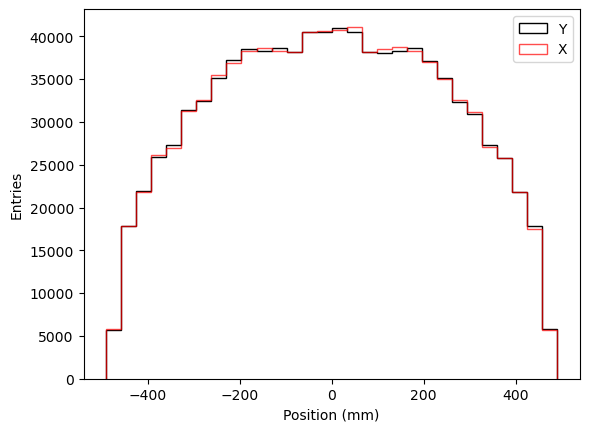

In [16]:
plt.hist(dst.X, bins = 30, color='k', label='Y', histtype='step');
plt.hist(dst.Y, bins = 30, color='r', label='X', alpha=0.7, histtype='step');
plt.legend()
plt.xlabel('Position (mm)')
plt.ylabel('Entries')

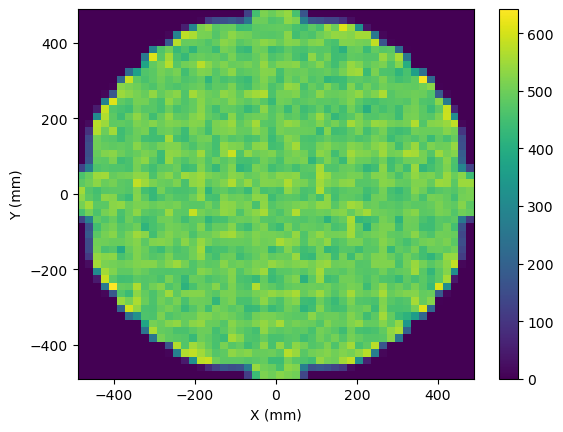

In [17]:
plt.hist2d(dst.X, dst.Y, bins=[50, 50]);
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.colorbar()

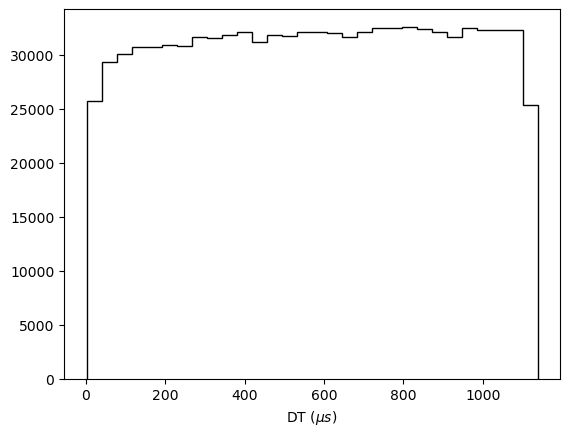

In [18]:
plt.hist(dst.DT, bins=30, color = 'k', histtype='step')
plt.xlabel(r'DT ($\mu s$)');

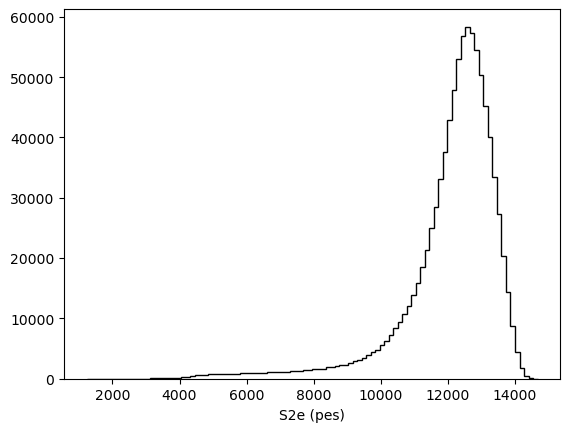

In [19]:
plt.hist(dst.S2e, bins = 100, color='k', histtype='step')
plt.xlabel('S2e (pes)');

In [20]:
dst.S2e[dst.S2e > 11000].mean()

12537.139596925368

# Krypton Map (5 bar)

In [29]:
from invisible_cities.reco.corrections import read_maps


map_5bar = read_maps('/Users/cherves/NEXT/5bar/map_MC_5bar_50x50.h5') # With ICAROS. No cuts on E, X, Y, R, etc.

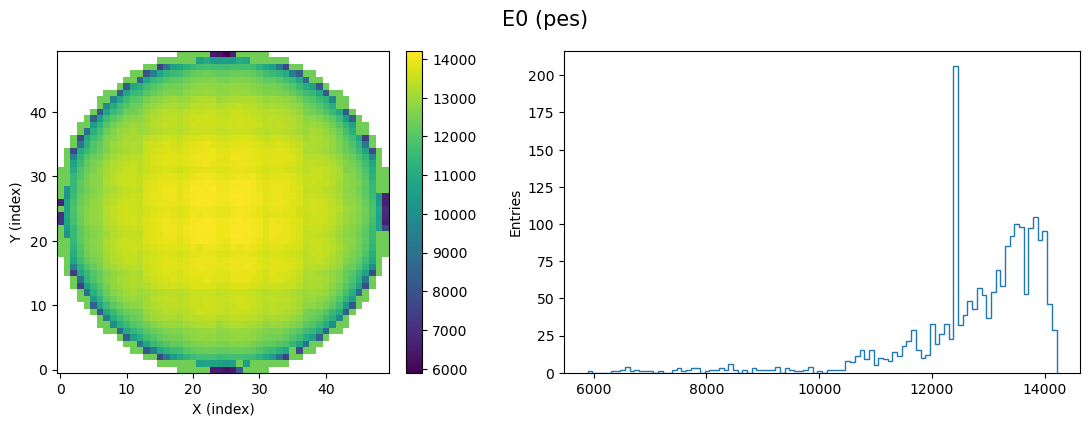

In [30]:
import matplotlib.gridspec as gridspec


variable = map_5bar.e0

plt.figure(figsize=(11, 4.3))
plt.suptitle(r'E0 (pes)', fontsize = 15)

gs  = gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios=[1.1, 1.3]) 

ax0 = plt.subplot(gs[0])
im  = ax0.imshow(variable, origin='lower', aspect='auto')

plt.colorbar(im, ax = ax0, fraction = 0.2, pad = 0.04)
ax0.set_xlabel('X (index)')
ax0.set_ylabel('Y (index)')


ax1 = plt.subplot(gs[1])
ax1.hist(variable.values.flatten(), bins = 100, histtype='step')
ax1.set_ylabel('Entries')

plt.tight_layout()

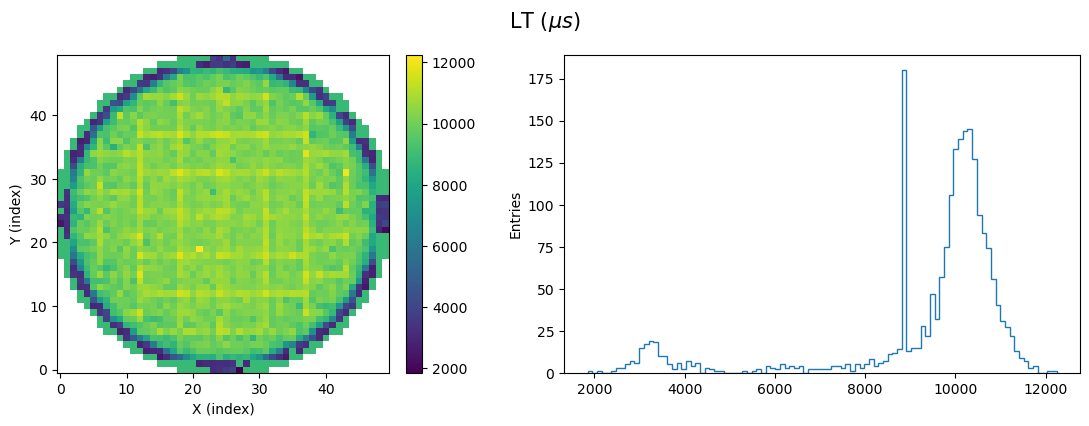

In [31]:
variable = map_5bar.lt

plt.figure(figsize=(11, 4.3))
plt.suptitle(r'LT ($\mu s$)', fontsize = 15)

gs  = gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios=[1.1, 1.3]) 

ax0 = plt.subplot(gs[0])
im  = ax0.imshow(variable, origin='lower', aspect='auto')

plt.colorbar(im, ax = ax0, fraction = 0.2, pad = 0.04)
ax0.set_xlabel('X (index)')
ax0.set_ylabel('Y (index)')


ax1 = plt.subplot(gs[1])
ax1.hist(variable.values.flatten(), bins = 100, histtype='step')
ax1.set_ylabel('Entries')

plt.tight_layout()

# Krypton Map (13.5 bar)

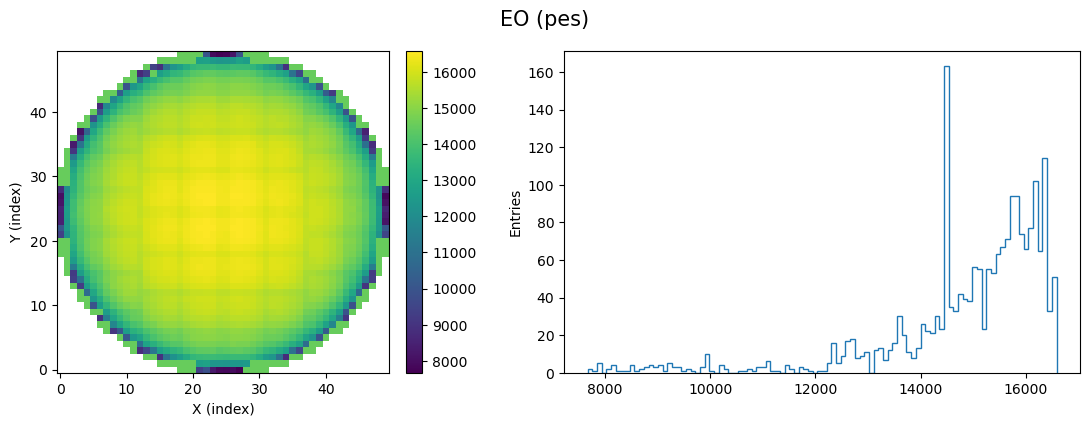

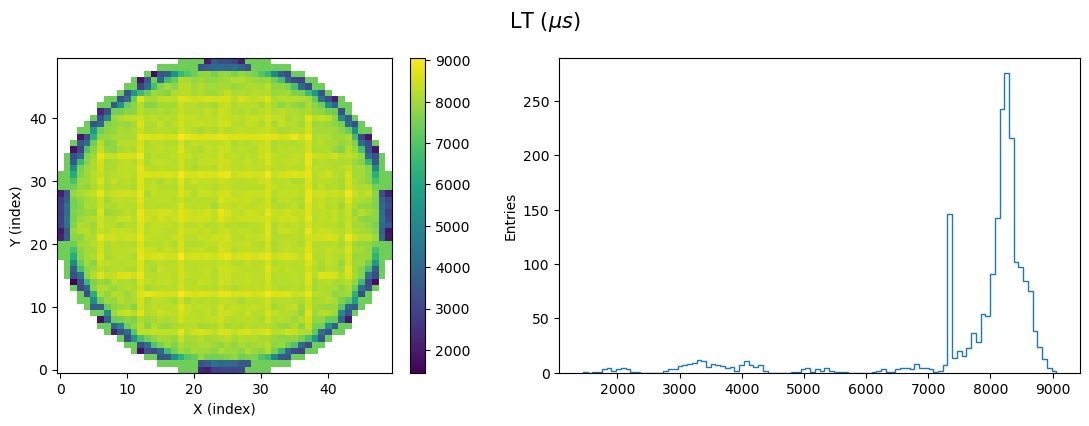

In [32]:
map_13bar = read_maps('/Users/cherves/NEXT/Mapas/map_MC_50x50_comparison.h5')


################# E0 ###################

variable = map_13bar.e0

plt.figure(figsize=(11, 4.3))
plt.suptitle(r'EO (pes)', fontsize = 15)

gs  = gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios=[1.1, 1.3]) 

ax0 = plt.subplot(gs[0])
im  = ax0.imshow(variable, origin='lower', aspect='auto')

plt.colorbar(im, ax = ax0, fraction = 0.2, pad = 0.04)
ax0.set_xlabel('X (index)')
ax0.set_ylabel('Y (index)')


ax1 = plt.subplot(gs[1])
ax1.hist(variable.values.flatten(), bins = 100, histtype='step')
ax1.set_ylabel('Entries')

plt.tight_layout()


################# LT ###################

variable = map_13bar.lt

plt.figure(figsize=(11, 4.3))
plt.suptitle(r'LT ($\mu s$)', fontsize = 15)

gs  = gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios=[1.1, 1.3]) 

ax0 = plt.subplot(gs[0])
im  = ax0.imshow(variable, origin='lower', aspect='auto')

plt.colorbar(im, ax = ax0, fraction = 0.2, pad = 0.04)
ax0.set_xlabel('X (index)')
ax0.set_ylabel('Y (index)')


ax1 = plt.subplot(gs[1])
ax1.hist(variable.values.flatten(), bins = 100, histtype='step')
ax1.set_ylabel('Entries')

plt.tight_layout()

# Comparing both Maps

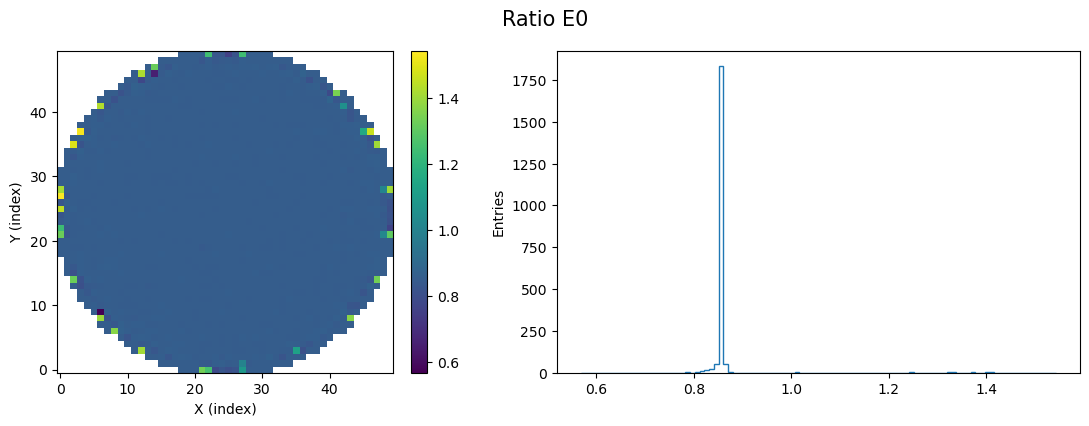

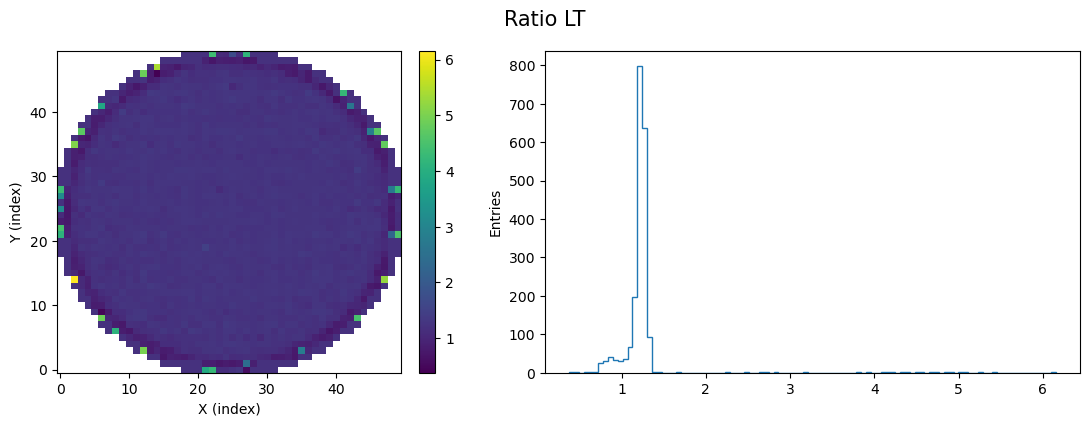

In [33]:
################# E0 ###################

variable = map_5bar.e0/map_13bar.e0

plt.figure(figsize=(11, 4.3))
plt.suptitle(r'Ratio E0', fontsize = 15)

gs  = gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios=[1.1, 1.3]) 

ax0 = plt.subplot(gs[0])
im  = ax0.imshow(variable, origin='lower', aspect='auto')

plt.colorbar(im, ax = ax0, fraction = 0.2, pad = 0.04)
ax0.set_xlabel('X (index)')
ax0.set_ylabel('Y (index)')


ax1 = plt.subplot(gs[1])
ax1.hist(variable.values.flatten(), bins = 100, histtype='step')
ax1.set_ylabel('Entries')

plt.tight_layout()


################# LT ###################

variable = map_5bar.lt/map_13bar.lt

plt.figure(figsize=(11, 4.3))
plt.suptitle(r'Ratio LT', fontsize = 15)

gs  = gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios=[1.1, 1.3]) 

ax0 = plt.subplot(gs[0])
im  = ax0.imshow(variable, origin='lower', aspect='auto')

plt.colorbar(im, ax = ax0, fraction = 0.2, pad = 0.04)
ax0.set_xlabel('X (index)')
ax0.set_ylabel('Y (index)')


ax1 = plt.subplot(gs[1])
ax1.hist(variable.values.flatten(), bins = 100, histtype='step')
ax1.set_ylabel('Entries')

plt.tight_layout()

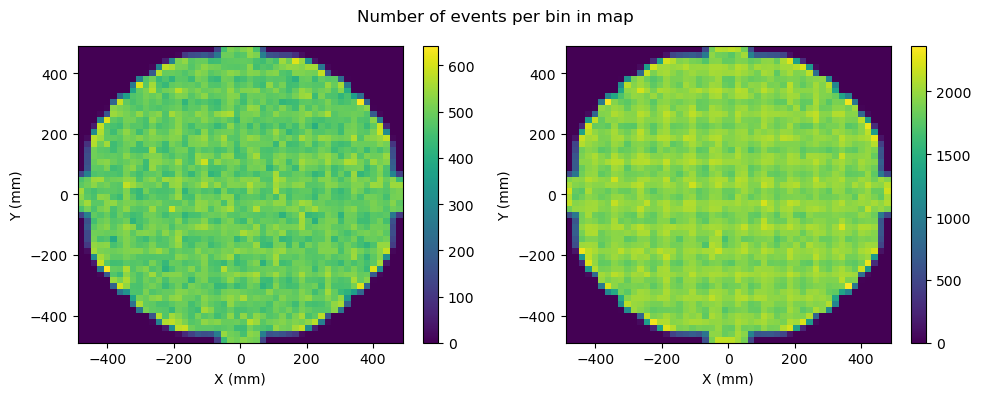

In [34]:
dst_4M = pd.read_hdf('/Users/cherves/NEXT/Mapas/kr83m_NEXT100.h5')

plt.figure(figsize=(10, 4))

plt.suptitle('Number of events per bin in map')

plt.subplot(1, 2, 1)

plt.hist2d(dst.X, dst.Y, bins = [50, 50]);
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.colorbar()


plt.subplot(1, 2, 2)

plt.hist2d(dst_4M.X, dst_4M.Y, bins = [50, 50])
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.colorbar()
plt.tight_layout()

# Applying Map to the corresponding KDST

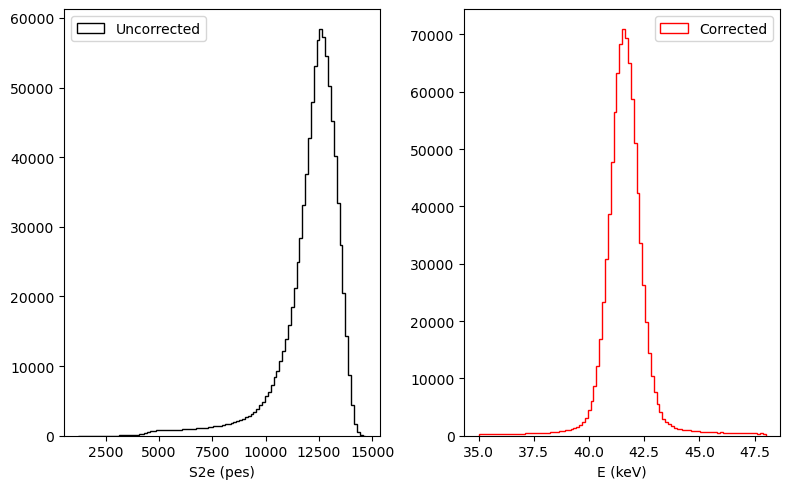

In [35]:
from invisible_cities.types.symbols           import NormStrategy
from invisible_cities.reco.corrections        import read_maps, apply_all_correction


map_5bar         = read_maps('/Users/cherves/NEXT/5bar/map_MC_5bar_50x50.h5')
total_correction = apply_all_correction(map_5bar, apply_temp=False, norm_strat=NormStrategy.kr)
corr_tot         = total_correction(dst.X, dst.Y, dst.Z,  dst.time)*1000


plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)

plt.hist(dst.S2e, bins = 100, color='k', histtype='step', label='Uncorrected')
plt.xlabel('S2e (pes)');
plt.legend(loc='upper left')


plt.subplot(1, 2, 2)

plt.hist(dst.S2e*corr_tot, bins = 100, range=[35, 48], label = 'Corrected', color='r', histtype='step')
plt.xlabel('E (keV)')
plt.legend()
plt.tight_layout()

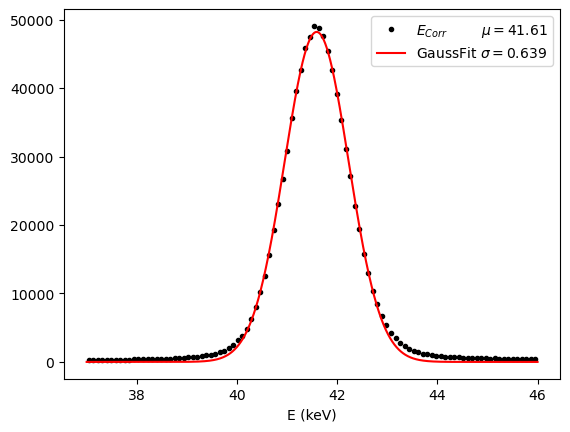

In [36]:
import scipy.optimize                       as     so
from   invisible_cities.core.core_functions import in_range, shift_to_bin_centers


def gauss(x, A, mu, sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

def chisqrd(obs, exp, error):
    return np.sum((obs - exp) ** 2 / (error ** 2))/(len(obs)-3)


rg          = [37, 46] # Range to consider

corrected_e = dst.S2e*corr_tot # Corrected energy array 

values, xvalues = np.histogram(corrected_e, range=rg, bins=100) # Bin our data

xvalues         = shift_to_bin_centers(xvalues) # Energies and errors
errors          = np.array(values)**0.5

par, cov = so.curve_fit(gauss, xvalues, values, p0 = [30000, 41.5, 0.5]) # Gaussian Fit

xlin = np.linspace(*rg, 10000) # We define these two to plot the Gaussian curve we obtain 
ylin = gauss(xlin, *par)       # if we use the parameters coming from the fit (the red line)

y_chi = gauss(np.array(xvalues), *par) # Chi2 calculation
chi2  = chisqrd(values, y_chi, errors)


plt.figure()

plt.plot(xvalues, values, '.k', label=f'$E_{{Corr}}$        $\mu ={np.mean(corrected_e[in_range(corrected_e, *rg)]):.4}$')
plt.plot(xlin, ylin, 'r-', label=f'GaussFit $\sigma={par[2]:.3}$') #\n $\chi^2$ = {chi2:.4}
plt.xlabel('E (keV)')
plt.legend(loc='upper right', fontsize=10)

In [37]:
A_5, x0_5, s_5  = par

sA_5  = np.sqrt(cov[0,0])
sx0_5 = np.sqrt(cov[1,1])
ss_5  = np.sqrt(cov[2,2])

print(f'x0  = {x0_5:.6} +- {sx0_5:.2}')
print(f'sig = {s_5:.5} +- {ss_5:.2}')

x0  = 41.5909 +- 0.0034
sig = 0.63947 +- 0.0034


In [38]:
def resolution(x0, sigma, sx0, ssigma):
    
    R  = (2*np.sqrt(2*np.log(2))*sigma)/x0
    
    sR = R*np.sqrt((ssigma/sigma)**2+(sx0/x0)**2)
    
    return R, sR


R_5, sR_5  = resolution(x0_5, s_5, sx0_5, ss_5)

print('R (%)   =', R_5*100)
print('sR (%)  =', sR_5*100)

''' Extrapolation for Qbb:'''

Qbb = 2458 # keV
Rbb_5 = R_5*np.sqrt(x0_5/Qbb)

print('Rbb (%) =', Rbb_5*100)

R (%)   = 3.620575110464144
sR (%)  = 0.01905913044846849
Rbb (%) = 0.4709620739589304


#### Let's compare the resolution we obtain with this with the one we would obtain with the 13.5 bar MC data.

Since the 13.5 bar MC data consists of nearly 4M events, it wouldn't be right to compare directly both sets, so we're going to perform a random sampling to make the number of events in both sets match. 

In [39]:
dst_4M = pd.read_hdf('/Users/cherves/NEXT/Mapas/kr83m_NEXT100.h5')  # Full kdst of 4M events at 13.5 bar

dst_4M = dst_4M.sample(n = len(dst)).sort_values(by = ['time'])

In [40]:
dst_4M

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
4,810,8.114779e+08,0,0,1,1,225.0,8.0,21.0,10000.0,...,8,345.483276,290.205933,2.753760,186.812617,147.084734,237.766425,0.666973,10.056423,9.784297
7,818,8.190849e+08,0,0,1,1,200.0,5.0,20.0,10025.0,...,8,930.463989,781.589722,3.988658,159.506740,-395.869529,426.796303,-1.187769,10.610300,10.931410
9,822,8.224519e+08,0,0,1,1,200.0,7.0,17.0,10000.0,...,8,962.491333,808.492676,4.137786,-289.189865,-274.201150,398.518567,-2.382793,10.671950,11.159954
10,824,8.257894e+08,0,0,1,1,175.0,3.0,14.0,10000.0,...,8,30.478079,25.601585,1.232396,429.231583,18.214383,429.617872,0.042409,8.724196,9.907442
11,826,8.270216e+08,0,0,1,1,125.0,3.0,8.0,10025.0,...,7,48.456772,40.703686,1.339888,74.606621,361.166303,368.791603,1.367090,8.931931,9.646041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726726,7999946,7.999948e+12,0,0,1,1,100.0,6.0,10.0,10000.0,...,8,539.491394,453.172760,3.160911,92.353851,334.653735,347.163299,1.301530,11.295956,9.557534
3726728,7999950,7.999951e+12,0,0,1,1,175.0,6.0,15.0,10000.0,...,8,477.482208,401.085022,2.907986,-332.204061,229.804806,403.942802,2.536420,10.172305,10.495265
3726734,7999962,7.999963e+12,0,0,1,1,125.0,12.0,19.0,10000.0,...,8,384.484528,322.966980,2.755504,-4.261945,-468.951844,468.971210,-1.579884,11.577146,9.040762
3726745,7999986,7.999987e+12,0,0,1,1,200.0,3.0,13.0,10175.0,...,8,31.309446,26.299934,1.240195,-44.831662,340.303426,343.243790,1.701782,10.103797,9.849943


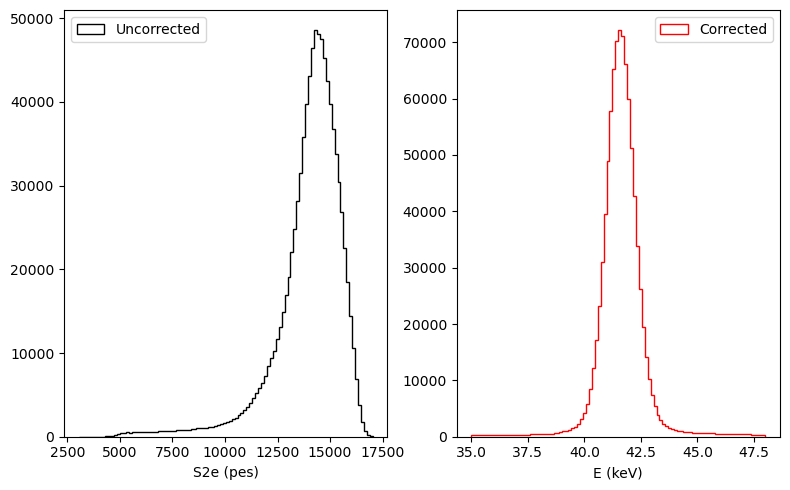

In [41]:
map_13bar        = read_maps('/Users/cherves/NEXT/Mapas/map_MC_50x50_comparison.h5')
total_corr_13bar = apply_all_correction(map_13bar, apply_temp=False, norm_strat=NormStrategy.kr)
corr_tot_13bar   = total_corr_13bar(dst_4M.X, dst_4M.Y, dst_4M.Z, dst_4M.time)*1000


plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)

plt.hist(dst_4M.S2e, bins = 100, color='k', histtype='step', label='Uncorrected')
plt.xlabel('S2e (pes)');
plt.legend(loc='upper left')


plt.subplot(1, 2, 2)

plt.hist(dst_4M.S2e*corr_tot_13bar, bins = 100, range=[35, 48], label = 'Corrected', color='r', histtype='step')
plt.xlabel('E (keV)')
plt.legend()
plt.tight_layout()

In [42]:
dst_4M.S2e[dst_4M.S2e > 11000].mean()

14226.542711674752

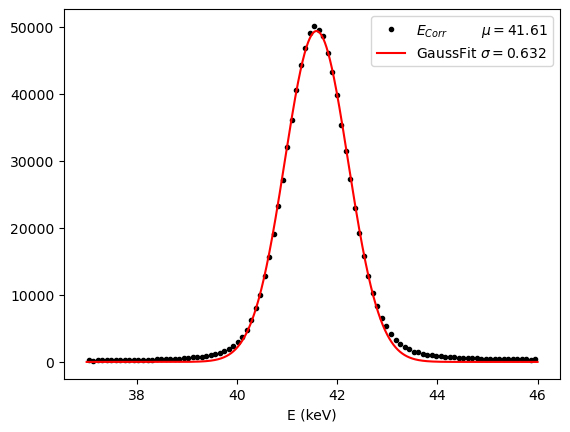

In [43]:
rg           = [37, 46] # Range to consider

corr_e_13bar = dst_4M.S2e*corr_tot_13bar # Corrected energy array 

values, xvalues = np.histogram(corr_e_13bar, range=rg, bins=100) # Bin our data

xvalues         = shift_to_bin_centers(xvalues) # Energies and errors
errors          = np.array(values)**0.5

par, cov = so.curve_fit(gauss, xvalues, values, p0 = [30000, 41.5, 0.5]) # Gaussian Fit

xlin = np.linspace(*rg, 10000) # We define these two to plot the Gaussian curve we obtain 
ylin = gauss(xlin, *par)       # if we use the parameters coming from the fit (the red line)

y_chi = gauss(np.array(xvalues), *par) # Chi2 calculation
chi2  = chisqrd(values, y_chi, errors)


plt.figure()

plt.plot(xvalues, values, '.k', label=f'$E_{{Corr}}$        $\mu ={np.mean(corr_e_13bar[in_range(corr_e_13bar, *rg)]):.4}$')
plt.plot(xlin, ylin, 'r-', label=f'GaussFit $\sigma={par[2]:.3}$')
plt.xlabel('E (keV)')
plt.legend(loc='upper right', fontsize=10)

In [44]:
A_13, x0_13, s_13  = par

sA_13  = np.sqrt(cov[0,0])
sx0_13 = np.sqrt(cov[1,1])
ss_13  = np.sqrt(cov[2,2])

print(f'x0  = {x0_13:.6} +- {sx0_13:.2}')
print(f'sig = {s_13:.5} +- {ss_13:.2}')

x0  = 41.5868 +- 0.0032
sig = 0.63207 +- 0.0032


In [45]:
R_13, sR_13  = resolution(x0_13, s_13, sx0_13, ss_13)

print('R (%)   =', R_13*100)
print('sR (%)  =', sR_13*100)

''' Extrapolation for Qbb:'''

Qbb = 2458 # keV
Rbb_13 = R_13*np.sqrt(x0_13/Qbb)

print('Rbb (%) =', Rbb_13*100)

R (%)   = 3.5790363767222826
sR (%)  = 0.018252330750408143
Rbb (%) = 0.465535418808835


Plotting the corrected energy for both datasets: 

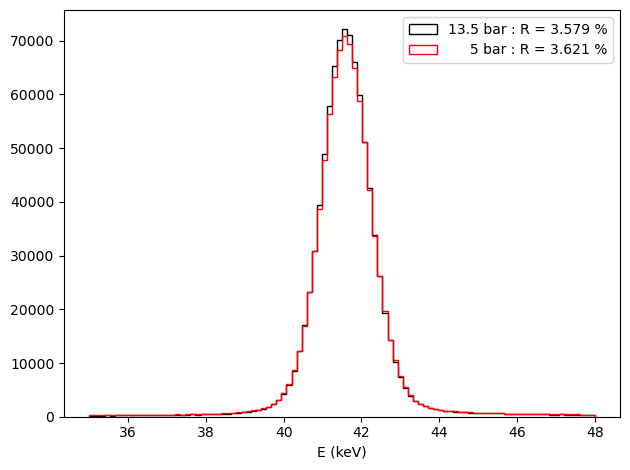

In [46]:
plt.hist(corr_e_13bar, bins = 100, range=[35, 48], label = f'13.5 bar : R = {100*R_13:.4} %',  color='k', histtype='step')
plt.hist(corrected_e,  bins = 100, range=[35, 48], label = f'     5 bar : R = {100*R_5:.4} %', color='r', histtype='step')
plt.xlabel('E (keV)')
plt.legend()
plt.tight_layout()

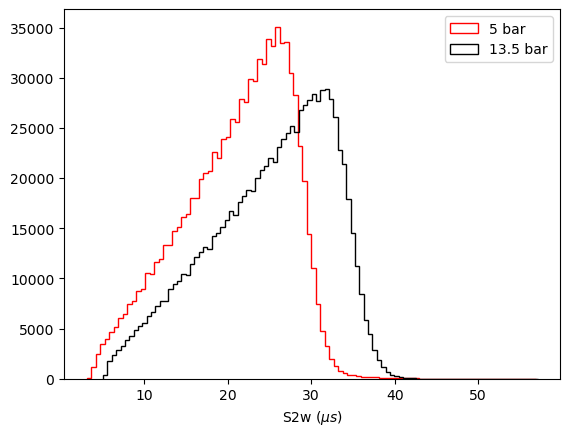

In [47]:
plt.hist(dst.S2w,    bins = 100, histtype = 'step', color = 'r', label = '5 bar')
plt.hist(dst_4M.S2w, bins = 100, histtype = 'step', color = 'k', label = '13.5 bar');

plt.xlabel(r'S2w ($\mu s$)')
plt.legend();

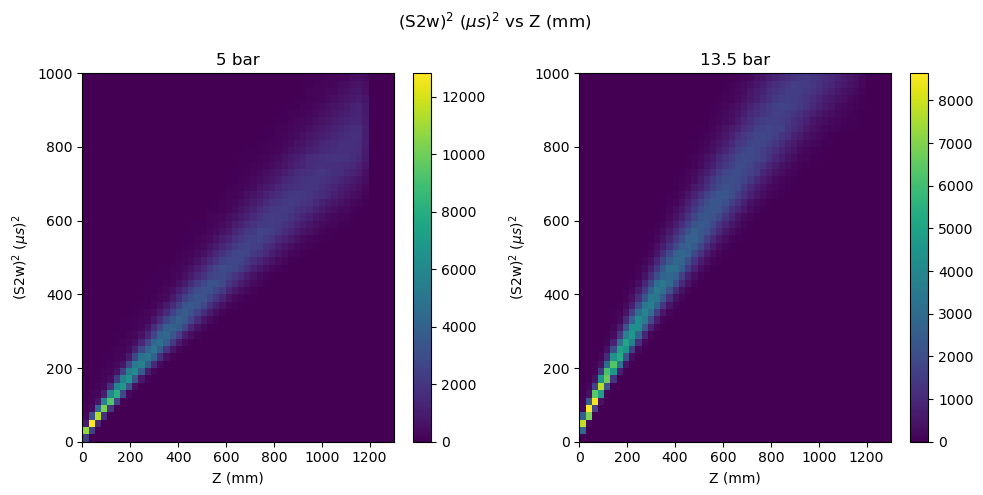

In [49]:
plt.figure(figsize=(10, 5))

plt.suptitle(r'(S2w)$^2$ $(\mu s)^2$ vs Z (mm)')

plt.subplot(1, 2, 1)

plt.hist2d(dst.Z,  dst.S2w**2, bins =[50, 50], label = '5 bar', range =[[0, 1300], [0, 1000]])
plt.colorbar()
plt.title('5 bar')
plt.xlabel('Z (mm)')
plt.ylabel('(S2w)$^2$ $(\mu s)^2$')

plt.subplot(1, 2, 2)

plt.hist2d(dst_4M.Z, dst_4M.S2w**2, bins = [50, 50], label = '13.5 bar', range =[[0, 1300], [0, 1000]])
plt.title('13.5 bar')
plt.xlabel('Z (mm)')
plt.ylabel('(S2w)$^2$ $(\mu s)^2$')
plt.colorbar()
plt.tight_layout()

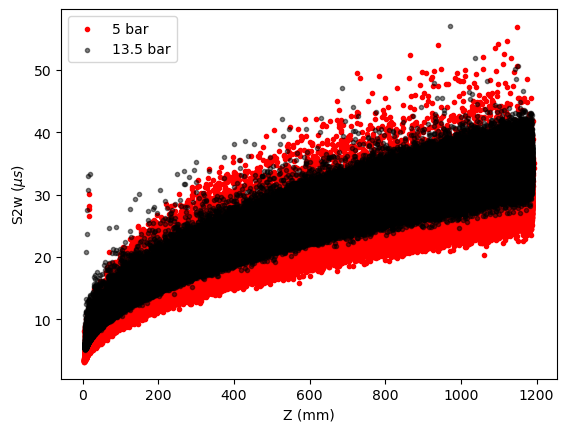

In [50]:
plt.scatter(dst.Z,    dst.S2w,    marker='.', color ='red',    label = '5 bar')
plt.scatter(dst_4M.Z, dst_4M.S2w, marker='.', color = 'black', label = '13.5 bar', alpha = 0.5)

plt.legend(loc='upper left')
plt.xlabel('Z (mm)')
plt.ylabel(r'S2w ($\mu s$)');

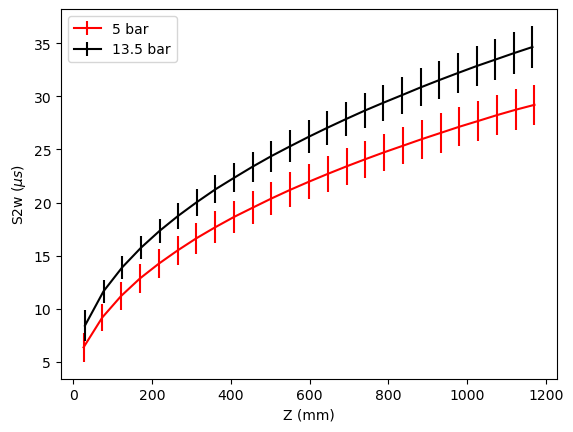

In [51]:
from invisible_cities.core.fit_functions import profileX


x5,  y5,  sy5  = profileX(xdata = dst.Z,    ydata = dst.S2w,    nbins = 25, yrange=None, xrange=None, std=True, drop_nan=True)
x13, y13, sy13 = profileX(xdata = dst_4M.Z, ydata = dst_4M.S2w, nbins = 25, yrange=None, xrange=None, std=True, drop_nan=True)

plt.errorbar(x = x5,  y = y5,  yerr = sy5,  color = 'r', label = '5 bar')
plt.errorbar(x = x13, y = y13, yerr = sy13, color = 'k', label = '13.5 bar')
plt.xlabel('Z (mm)')
plt.ylabel(r'S2w ($\mu s$)')
plt.legend()

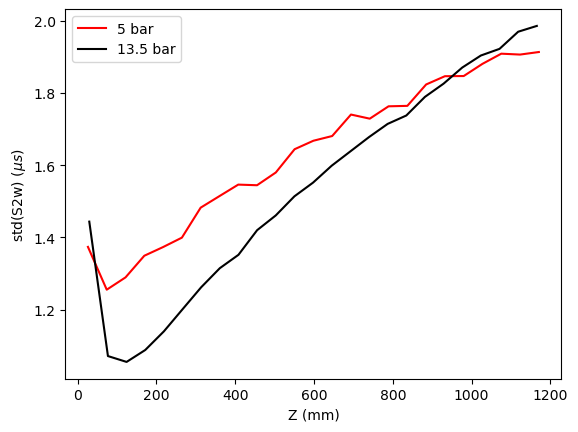

In [52]:
plt.plot(x5,  sy5,  color = 'r', label = '5 bar')
plt.plot(x13, sy13, color = 'k', label = '13.5 bar')
plt.xlabel('Z (mm)')
plt.ylabel(r'std(S2w) ($\mu s$)')
plt.legend()

Text(0, 0.5, 'Ratio s(S2w) between 5 and 10 bar (%)')

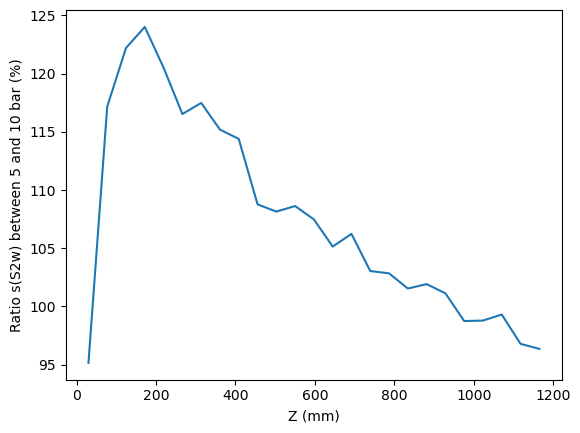

In [53]:
plt.plot(x13, sy5/sy13*100)
plt.xlabel('Z (mm)')
plt.ylabel(r'Ratio s(S2w) between 5 and 10 bar (%)')

# NOTE: I should NOT compare the width error simply dividing like I did because the X bins (the Z divisions
# made with the profile) are not strictly the same in the two datasets (but they are pretty close). This plot
# goes to show that the dispersion in S2w tends to be systematically higher when performing at 5 bar, except 
# for really high Z

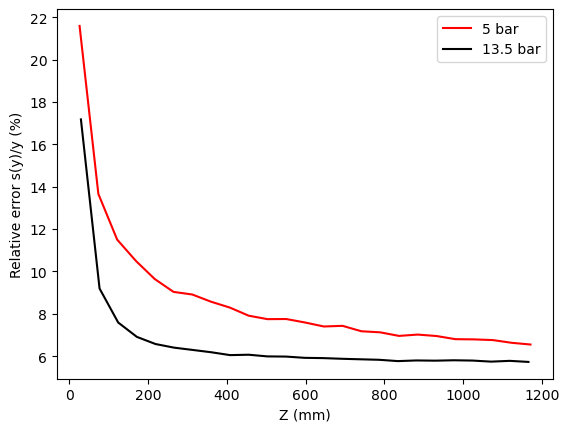

In [54]:
plt.plot(x5,  sy5/y5*100,   color = 'r', label = '5 bar')
plt.plot(x13, sy13/y13*100, color = 'k', label = '13.5 bar')
plt.xlabel('Z (mm)')
plt.ylabel(r'Relative error s(y)/y (%)')
plt.legend()